In [1]:
import pandas as pd
import numpy as np

In [2]:
header = ['user_id', 'item_id', 'rating', 'timestamp']
dataset = pd.read_csv('data/ratings_Digital_Music.csv', names=header)

In [3]:
dataset.head()

,user_id,item_id,rating,timestamp
0,A2EFCYXHNK06IS,5555991584,5.0,978480000
1,A1WR23ER5HMAA9,5555991584,5.0,953424000
2,A2IR4Q0GPAFJKW,5555991584,4.0,1393545600
3,A2V0KUVAB9HSYO,5555991584,4.0,966124800
4,A1J0GL9HCA7ELW,5555991584,5.0,1007683200


In [4]:
df = dataset.head(10000)

In [5]:
n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
print ('Number of users = ' , str(n_users) , ' | Number of movies = ' , str(n_items))

Number of users =  8355  | Number of movies =  500


In [6]:
from sklearn import cross_validation as cv
train_data, test_data = cv.train_test_split(df, test_size=0.25)

/home/mauli/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
#Sparsity of dataset in %
sparsity=1.0-len(df)/float(n_users*n_items)
print ('The sparsity level of Book Crossing dataset is ' ,  str(sparsity*100) , ' %')

The sparsity level of Book Crossing dataset is  99.7606223818073  %


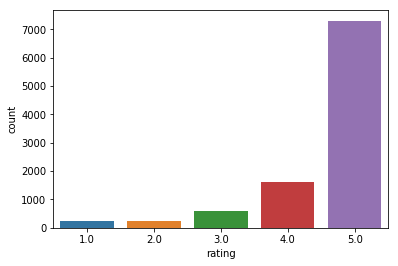

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df , x='rating')
plt.show()

In [16]:
ratings_count = pd.DataFrame(df.groupby(['item_id'])['rating'].sum())
top10 = ratings_count.sort_values('rating', ascending = False).head(10)
print ("Following songs are recommended")
top10

Following songs are recommended


,rating
item_id,
B00000016W,2660.0
B00000064G,1314.0
B000000TDH,1004.0
B000000OUJ,949.0
B00000053X,659.0
B000000WCV,618.0
B0000002ME,603.0
5555991584,603.0
B00000016T,571.0


In [32]:
data_matrix = df.pivot(index='user_id', columns='item_id', values='rating').fillna(0)
data_matrix.head()

item_id,5555991584,6308051551,7901622466,B0000000ZW,B00000016T,B00000016W,B00000017R,B0000001BA,B0000001BO,B0000001O0,...,B0000011CU,B0000011GU,B0000011MD,B0000011N5,B0000011P7,B0000011WE,B0000011X5,B0000011XM,B00000127G,B0000012T3
user_id,,,,,,,,,,,,,,,,,,,,,
A04345582HHNXEA9SAET4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A07465992K7FVSL53VA9B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A08161909WK3HU7UYTMW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A086594320Z777EHOFWKU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10175AMUHOQC4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#rechecking the sparsity
sparsity=1.0-len(df)/float(n_users*n_items)
print ('The sparsity level of Music dataset is ' ,  str(sparsity*100) , ' %')

The sparsity level of Music dataset is  99.7606223818073  %


In [44]:
#setting global variables
global metric,k
k=10
metric='cosine'
#ratings = df
from sklearn.neighbors import NearestNeighbors

In [45]:
#This function finds k similar users given the user_id and ratings matrix 
#These similarities are same as obtained via using pairwise_distances
def findksimilarusers(user_id, ratings, metric = metric, k=k):
    similarities=[]
    indices=[]
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute') 
    model_knn.fit(ratings)
    loc = ratings.index.get_loc(user_id)
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
            
    return similarities,indices

In [46]:
#This function predicts rating for specified user-item combination based on user-based approach
def predict_userbased(user_id, item_id, ratings, metric = metric, k=k):
    prediction=0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilarusers(user_id, ratings,metric, k) #similar users based on cosine similarity
    mean_rating = ratings.iloc[user_loc,:].mean() #to adjust for zero based indexing
    sum_wt = np.sum(similarities)-1
    product=1
    wtd_sum = 0 
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == user_loc:
            continue;
        else: 
            ratings_diff = ratings.iloc[indices.flatten()[i],item_loc]-np.mean(ratings.iloc[indices.flatten()[i],:])
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
    
    #in case of very sparse datasets, using correlation metric for collaborative based approach may give negative ratings
    #which are handled here as below
    if prediction <= 0:
        prediction = 1   
    elif prediction >10:
        prediction = 10
    
    prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
    print ('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))

    return prediction

In [47]:
predict_userbased('A10175AMUHOQC4','7901622466',data_matrix);


Predicted rating for user A10175AMUHOQC4 -> item 7901622466: 0
